### 1. Import Libraries


In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score
import torch
import torch.nn as nn

### 2. Load Data


In [181]:
# Load data
df = pd.read_csv("../dataset/data.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [182]:
# Variables table
df_variables = pd.read_csv("../dataset/variables.csv")
df_variables.head(len(df_variables))

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,NaN,NaN,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",NaN,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",NaN,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",NaN,no
4,default,Feature,Binary,NaN,has credit in default?,NaN,no
5,balance,Feature,Integer,NaN,average yearly balance,euros,no
6,housing,Feature,Binary,NaN,has housing loan?,NaN,no
7,loan,Feature,Binary,NaN,has personal loan?,NaN,no
8,contact,Feature,Categorical,NaN,contact communication type (categorical: 'cell...,NaN,yes
9,day_of_week,Feature,Date,NaN,last contact day of the week,NaN,no


In [183]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


#### 2.1. Target Variable


In [184]:
# Target variable
df_target = pd.read_csv("../dataset/labels.csv")
df_target.head()

,y
0,no
1,no
2,no
3,no
4,no


In [185]:
# Value counts
df_target["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [186]:
# Normalised value counts
df_target["y"].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

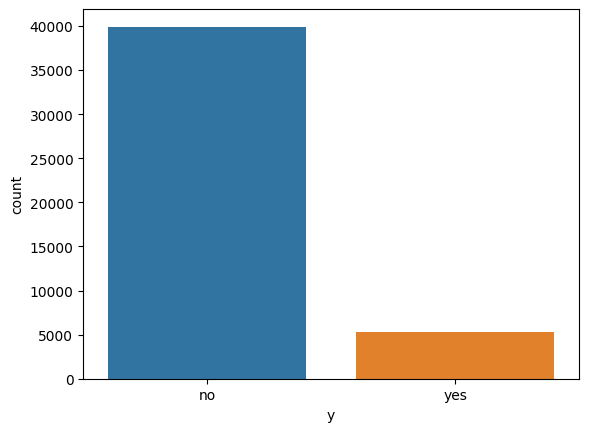

In [187]:
# Visualise the target variable
sns.countplot(x="y", data=df_target, hue="y")
plt.show()

In [188]:
# Add the 'y' column from df_target as a new column in df
df["y"] = df_target["y"]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### 3. Exploratory Data Analysis


#### 3.1. Missing Values


In [189]:
# Count missing values per column
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [190]:
# Replace missing values

# Numerical columns have no missing values

# Categorical columns
df = df.fillna(value={"job": "missing"})
df = df.fillna(value={"education": "missing"})
df = df.fillna(value={"contact": "missing"})
df = df.fillna(value={"poutcome": "missing"})

In [191]:
# Recount missing values per column
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

#### 3.2. Unique Values


In [192]:
# Investigate unique values
df.nunique()

age              77
job              12
marital           3
education         4
default           2
balance        7168
housing           2
loan              2
contact           3
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          4
y                 2
dtype: int64

#### 3.3. Categorical Variables


In [193]:
# Categorical Variables
def explore_categorical(col_name):
    print("{0} Summary".format(col_name))
    print("\n")

    # Print the count of each category
    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")

    # Print the ratio of each category
    print("{0} Ratio".format(col_name))
    print(df[col_name].value_counts(normalize=True))
    print("\n")

    # Print counts of y grouped by the categorical column
    print("{0} Default Counts".format(col_name))
    print(df.groupby(col_name)["y"].value_counts().unstack(level=-1))
    print("\n")

    # Print ratio of y grouped by the categorical column
    print("{0} Default Ratio".format(col_name))
    print(df.groupby(col_name)["y"].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    # Plot ratio of y by the categorical column
    sns.catplot(data=df, kind="count", x=col_name, hue="y")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

job Summary


job Counts
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
missing           288
Name: count, dtype: int64


job Ratio
job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
missing          0.006370
Name: proportion, dtype: float64


job Default Counts
y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
missing         254    34
retired        1748   516
self-employed  1392   187
services       3785   369
student      

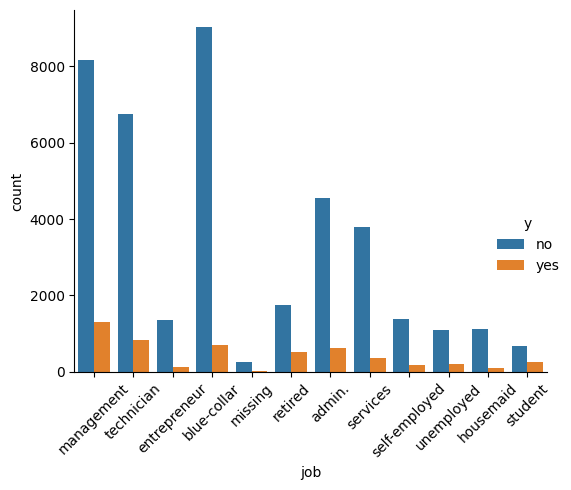

In [194]:
# Explore job column
explore_categorical("job")

#### 3.4. Continuous Variables


In [195]:
# Continous Variables
def explore_continuous(col_name):
    # Print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(df[col_name].describe())
    print("\n")

    # Look at boxplot
    sns.boxplot(x=col_name, data=df)
    plt.show()

    # Look at the distribution
    sns.displot(df[col_name], kde=True)
    plt.show()

    # Grouping with the target variable
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(df.groupby("y")[col_name].describe())

    # Look at grouped boxplot
    sns.boxplot(x=col_name, y="y", data=df, orient="h")
    plt.show()

pdays Summary


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64




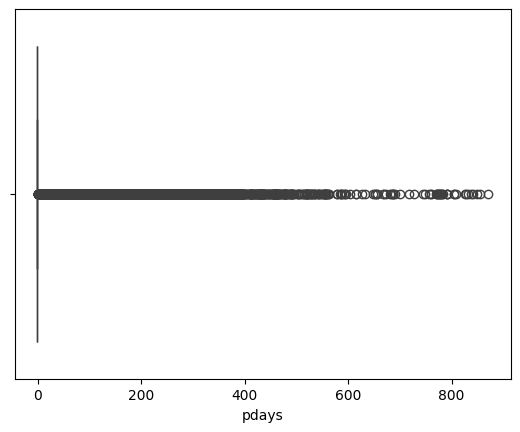

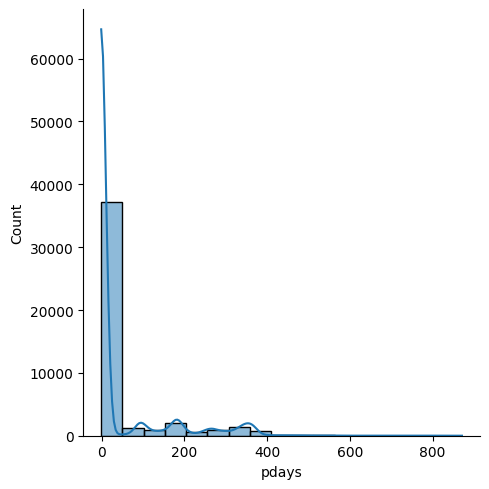

pdays Grouped Summary


       count       mean         std  min  25%  50%   75%    max
y                                                              
no   39922.0  36.421372   96.757135 -1.0 -1.0 -1.0  -1.0  871.0
yes   5289.0  68.702968  118.822266 -1.0 -1.0 -1.0  98.0  854.0


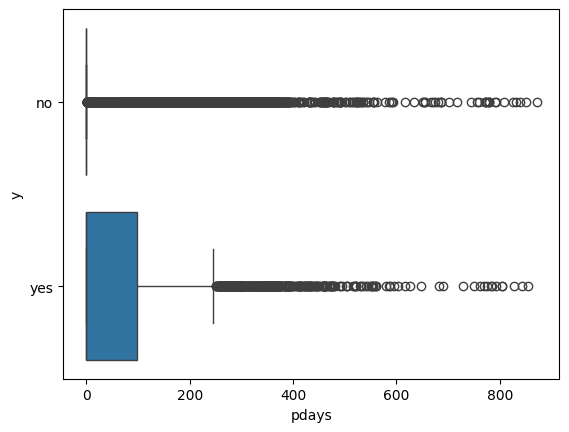

In [196]:
# Explore age column
explore_continuous('pdays')

#### 3.5. Binary Variables


housing Summary


housing Counts
housing
yes    25130
no     20081
Name: count, dtype: int64


housing Ratio
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64


housing Default Counts
y           no   yes
housing             
no       16727  3354
yes      23195  1935


housing Default Ratio
y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000




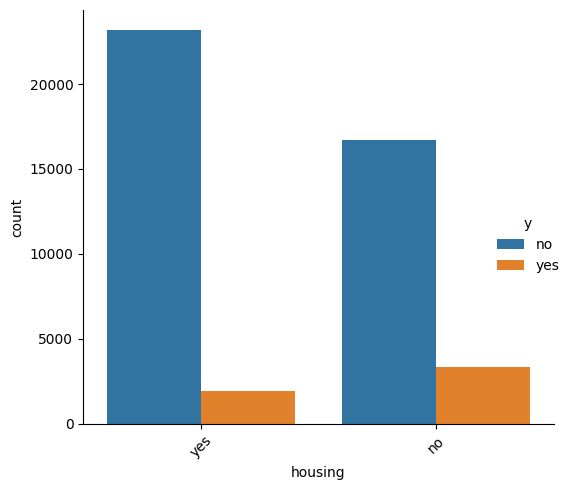

In [197]:
# Binary Variables
explore_categorical("housing")

### 4. Feature Engineering


#### 4.1. Normalisation


##### 4.1.1. Numerical Columns


In [198]:
numerical_columns = df_variables[df_variables["type"] == "Integer"]["name"].tolist()
print(numerical_columns)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


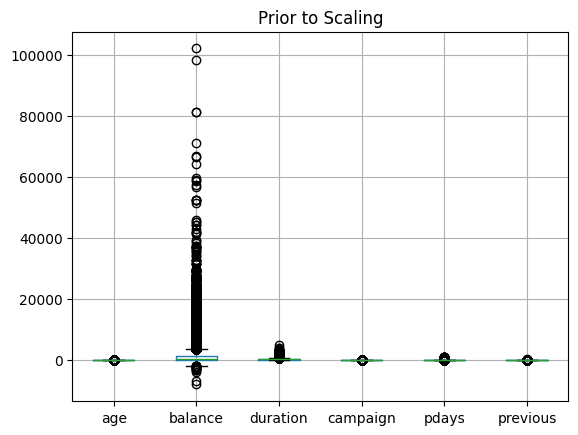

In [199]:
# Prior to scaling
df[numerical_columns].boxplot()
plt.title("Prior to Scaling")
plt.show()

In [200]:
# # Min-max normalisation
# mm_scalar = MinMaxScaler()
# df[numerical_columns] = mm_scalar.fit_transform(df[numerical_columns])

In [201]:
# # After scaling
# df[numerical_columns].boxplot()
# plt.title("After Scaling")
# plt.show()

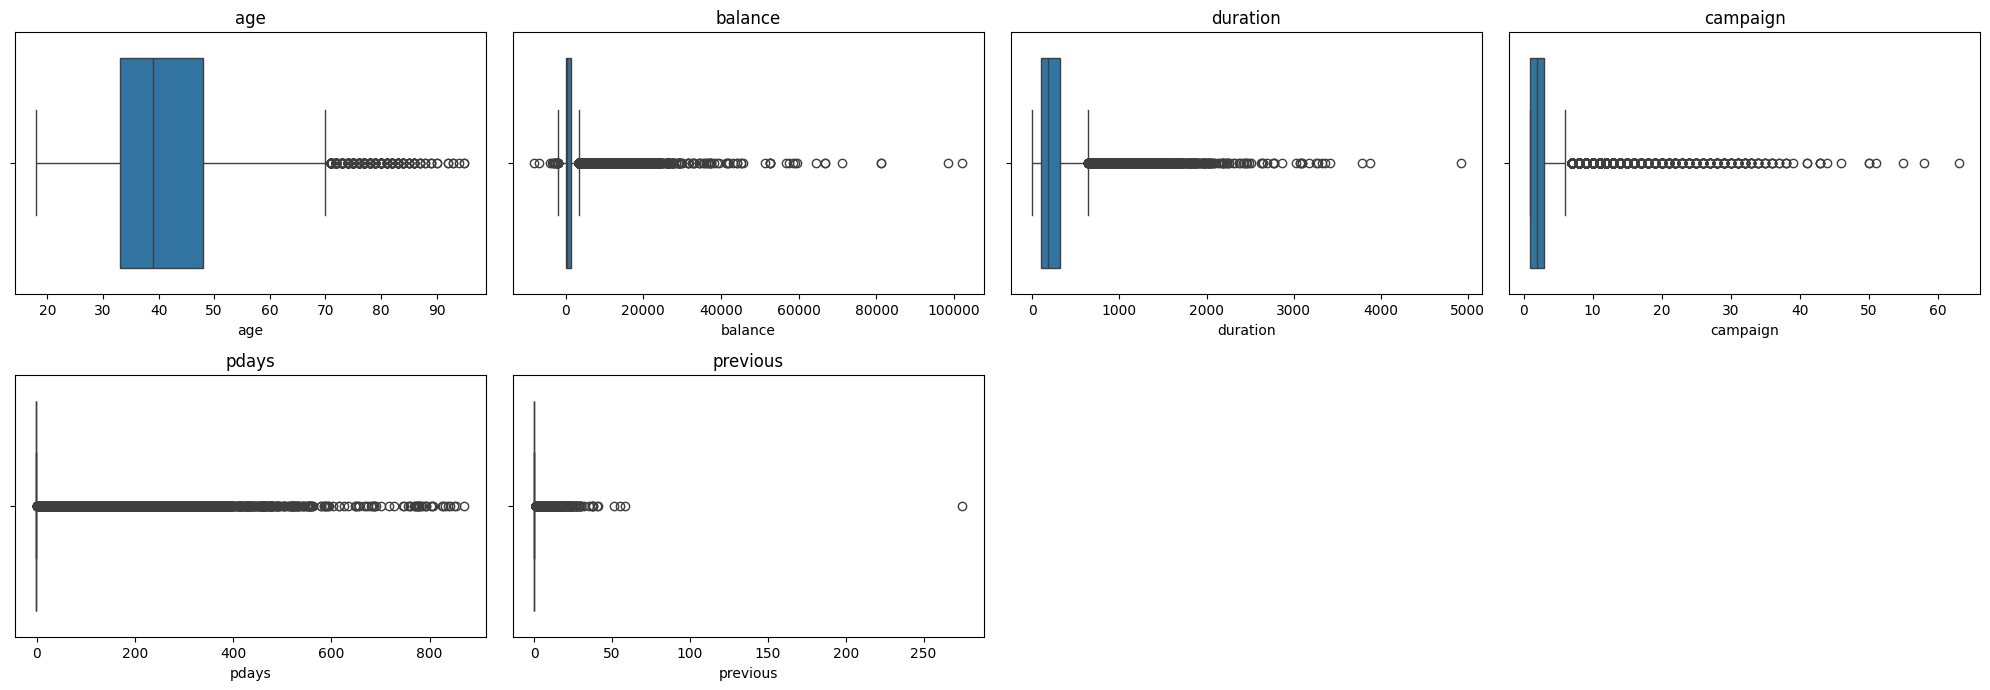

In [202]:
# Create a box plot to visualise outliers
plt.figure(figsize=(20, 10))
for i in range(len(numerical_columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[numerical_columns[i]])
    plt.title(numerical_columns[i])
plt.tight_layout()
plt.show()

###### Outliers

RobustScaler is a good alternative when dealing with data that contains many outliers. 

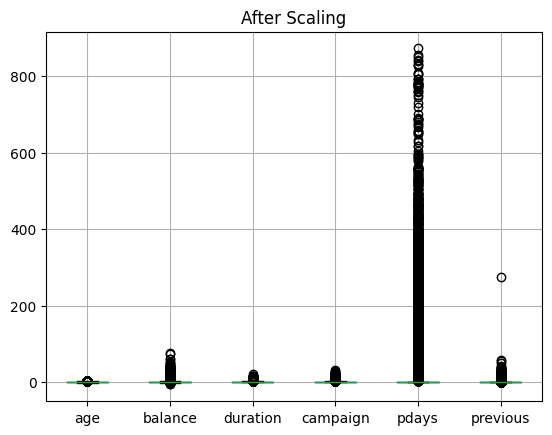

In [203]:
# Robust normalisation
rb_scalar = RobustScaler()
df[numerical_columns] = rb_scalar.fit_transform(df[numerical_columns])

# After scaling
df[numerical_columns].boxplot()
plt.title("After Scaling")
plt.show()

pdays Summary


count    45211.000000
mean        41.197828
std        100.128746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        872.000000
Name: pdays, dtype: float64




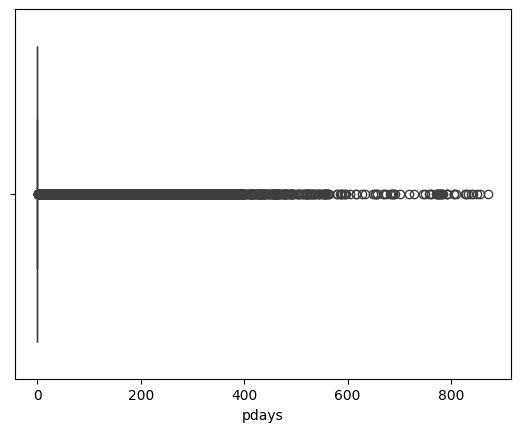

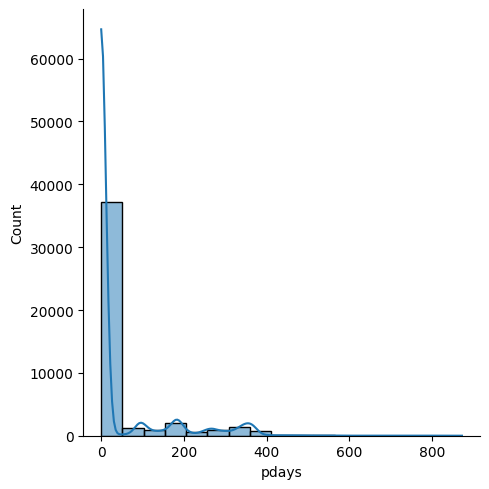

pdays Grouped Summary


       count       mean         std  min  25%  50%   75%    max
y                                                              
no   39922.0  37.421372   96.757135  0.0  0.0  0.0   0.0  872.0
yes   5289.0  69.702968  118.822266  0.0  0.0  0.0  99.0  855.0


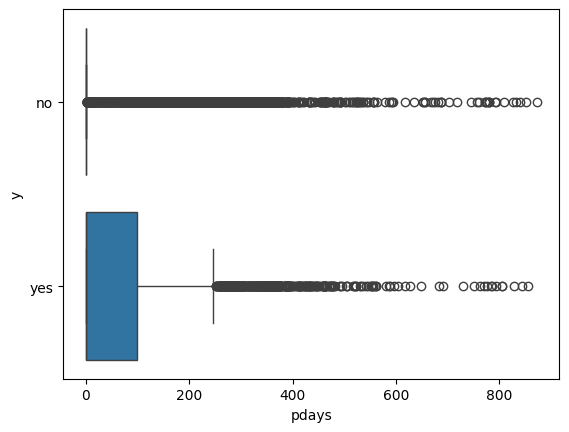

In [204]:
explore_continuous('pdays')

##### 4.1.2. Binary Columns


In [205]:
binary_columns = df_variables[df_variables["type"] == "Binary"]["name"].tolist()
print(binary_columns)

['default', 'housing', 'loan', 'y']


In [206]:
df[binary_columns] = df[binary_columns].apply(lambda col: col.map({"yes": 1, "no": 0}))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,1.266667,management,married,tertiary,0,1.250000,1,0,missing,5,may,0.375000,-0.5,0.0,0.0,missing,0
1,0.333333,technician,single,secondary,0,-0.308997,1,0,missing,5,may,-0.134259,-0.5,0.0,0.0,missing,0
2,-0.400000,entrepreneur,married,secondary,0,-0.328909,1,1,missing,5,may,-0.481481,-0.5,0.0,0.0,missing,0
3,0.533333,blue-collar,married,missing,0,0.780236,1,0,missing,5,may,-0.407407,-0.5,0.0,0.0,missing,0
4,-0.400000,missing,single,missing,0,-0.329646,0,0,missing,5,may,0.083333,-0.5,0.0,0.0,missing,0


##### 4.1.3. Categorical Columns


###### Ordinal Columns


In [207]:
ordinal_column = "education"
categories = sorted(df[ordinal_column].unique())

In [208]:
# Ordinal-encoding
df[ordinal_column] = df[ordinal_column].apply(
    lambda x: (categories.index(x)) / (len(categories) - 1)
)

print(df[ordinal_column].value_counts())

education
0.666667    23202
1.000000    13301
0.333333     6851
0.000000     1857
Name: count, dtype: int64


###### Nominal Columns


In [209]:
nominal_column = df_variables[
    (df_variables["type"] == "Categorical") & (df_variables["name"] != "education")
]["name"].tolist()
print(nominal_column)

['job', 'marital', 'contact', 'poutcome']


In [210]:
# One-hot encoding
df = pd.get_dummies(df, columns=nominal_column, drop_first=False)
new_cols = [
    col
    for col in df.columns
    if any(orig_col + "_" in col for orig_col in nominal_column)
]
df[new_cols] = df[new_cols].astype(int)

df.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success
0,1.266667,1.000000,0,1.250000,1,0,5,may,0.375000,-0.5,...,0,1,0,0,1,0,0,1,0,0
1,0.333333,0.666667,0,-0.308997,1,0,5,may,-0.134259,-0.5,...,0,0,1,0,1,0,0,1,0,0
2,-0.400000,0.666667,0,-0.328909,1,1,5,may,-0.481481,-0.5,...,0,1,0,0,1,0,0,1,0,0
3,0.533333,0.000000,0,0.780236,1,0,5,may,-0.407407,-0.5,...,0,1,0,0,1,0,0,1,0,0
4,-0.400000,0.000000,0,-0.329646,0,0,5,may,0.083333,-0.5,...,0,0,1,0,1,0,0,1,0,0


##### 4.1.4. Date Columns


In [211]:
# explore_categorical('day')

# Rename 'day_of_week' to 'day'
df.rename(columns={"day_of_week": "day"}, inplace=True)
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success
0,1.266667,1.000000,0,1.250000,1,0,5,may,0.375000,-0.5,...,0,1,0,0,1,0,0,1,0,0
1,0.333333,0.666667,0,-0.308997,1,0,5,may,-0.134259,-0.5,...,0,0,1,0,1,0,0,1,0,0
2,-0.400000,0.666667,0,-0.328909,1,1,5,may,-0.481481,-0.5,...,0,1,0,0,1,0,0,1,0,0
3,0.533333,0.000000,0,0.780236,1,0,5,may,-0.407407,-0.5,...,0,1,0,0,1,0,0,1,0,0
4,-0.400000,0.000000,0,-0.329646,0,0,5,may,0.083333,-0.5,...,0,0,1,0,1,0,0,1,0,0


In [212]:
# explore_categorical('month')

# Convert month names to month numbers
month_map = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}
df["month"] = df["month"].map(month_map)

df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success
0,1.266667,1.000000,0,1.250000,1,0,5,5,0.375000,-0.5,...,0,1,0,0,1,0,0,1,0,0
1,0.333333,0.666667,0,-0.308997,1,0,5,5,-0.134259,-0.5,...,0,0,1,0,1,0,0,1,0,0
2,-0.400000,0.666667,0,-0.328909,1,1,5,5,-0.481481,-0.5,...,0,1,0,0,1,0,0,1,0,0
3,0.533333,0.000000,0,0.780236,1,0,5,5,-0.407407,-0.5,...,0,1,0,0,1,0,0,1,0,0
4,-0.400000,0.000000,0,-0.329646,0,0,5,5,0.083333,-0.5,...,0,0,1,0,1,0,0,1,0,0


In [213]:
# Cyclical encoding for day of the month (assuming max 31 days)
df["day_sin"] = np.sin(2 * np.pi * df["day"] / 31)
df["day_cos"] = np.cos(2 * np.pi * df["day"] / 31)

# Cyclical encoding for month (12 months in a year)
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success,day_sin,day_cos,month_sin,month_cos
0,1.266667,1.000000,0,1.250000,1,0,5,5,0.375000,-0.5,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
1,0.333333,0.666667,0,-0.308997,1,0,5,5,-0.134259,-0.5,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
2,-0.400000,0.666667,0,-0.328909,1,1,5,5,-0.481481,-0.5,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
3,0.533333,0.000000,0,0.780236,1,0,5,5,-0.407407,-0.5,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
4,-0.400000,0.000000,0,-0.329646,0,0,5,5,0.083333,-0.5,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025


In [214]:
# Drop the original 'month' and 'day_of_week' columns
df.drop(columns=["month", "day"], inplace=True)

df.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success,day_sin,day_cos,month_sin,month_cos
0,1.266667,1.000000,0,1.250000,1,0,0.375000,-0.5,0.0,0.0,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
1,0.333333,0.666667,0,-0.308997,1,0,-0.134259,-0.5,0.0,0.0,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
2,-0.400000,0.666667,0,-0.328909,1,1,-0.481481,-0.5,0.0,0.0,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
3,0.533333,0.000000,0,0.780236,1,0,-0.407407,-0.5,0.0,0.0,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025
4,-0.400000,0.000000,0,-0.329646,0,0,0.083333,-0.5,0.0,0.0,...,1,0,0,1,0,0,0.848644,0.528964,0.5,-0.866025


### Train/Test Split


In [215]:
X = df.drop(['y'], axis=1)
y = df['y']


In [216]:
# Check dimensions of features and target
print(X.shape)
print(y.shape)

(45211, 36)
(45211,)


In [217]:
# Check info and dtype of features and targets
X.info()
y.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   education          45211 non-null  float64
 2   default            45211 non-null  int64  
 3   balance            45211 non-null  float64
 4   housing            45211 non-null  int64  
 5   loan               45211 non-null  int64  
 6   duration           45211 non-null  float64
 7   campaign           45211 non-null  float64
 8   pdays              45211 non-null  float64
 9   previous           45211 non-null  float64
 10  job_admin.         45211 non-null  int64  
 11  job_blue-collar    45211 non-null  int64  
 12  job_entrepreneur   45211 non-null  int64  
 13  job_housemaid      45211 non-null  int64  
 14  job_management     45211 non-null  int64  
 15  job_missing        45211 non-null  int64  
 16  job_retired        452

dtype('int64')

In [218]:
# Convert to numpy arrays
X = X.values
y = y.values
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [219]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ANN


### Model Evaluation


In [220]:
# Confusion Matrix
# Precision
# Recall
# F1 Score

In [221]:
# Decaying learning rate and non decaying learning rate